In [3]:
# 导入模块
import numpy as np
from sklearn.datasets import make_blobs  
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder

#Scaling and Splitting
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

df=pd.read_csv('Diamonds Prices2022.csv')
df = df.drop(['Unnamed: 0'],axis=1)    #删除unnamed这一列，读取数据会多出这一列

In [4]:
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [5]:
encoder = LabelEncoder()  #编码
df['cut'] = encoder.fit_transform(df['cut'])  #数据的统一化和标准化
df['color'] = encoder.fit_transform(df['color'])
df['clarity'] = encoder.fit_transform(df['clarity'])

In [6]:
X = df.drop(['price','x','y','z'],axis=1)       #删除这些列
Y = df.drop(['carat','cut','color','clarity','depth','table'],axis=1)
price=df['price']
scaler = StandardScaler()#去均值和方差归一化。且是针对每一个特征维度
normalized_x= pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
normalized_y= pd.DataFrame(scaler.fit_transform(Y),columns = Y.columns)

In [7]:
X=normalized_x
y=normalized_y

In [8]:
x_embedded = TSNE(n_components=2, learning_rate='auto',      #降维并可视化
                  init='pca',perplexity=50).fit_transform(normalized_x)  #perplexity参数非常不敏感 ,fit_transform是fit和transform的组合，既包括了训练又包含了转换。
x_embedded.shape

C:\Users\DL\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(53943, 2)

C:\Users\DL\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

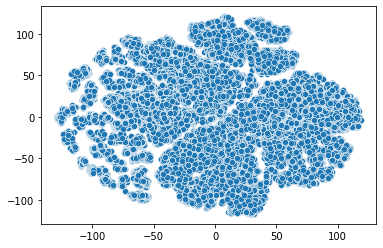

In [9]:
sns.scatterplot(x_embedded[:,0],x_embedded[:,1])  #绘制散点图

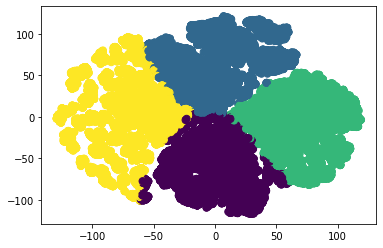

In [10]:
gmm = GaussianMixture(n_components=4).fit(x_embedded)
labels = gmm.predict(x_embedded)
plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=labels, s=50, cmap='viridis');

<AxesSubplot:ylabel='Count'>

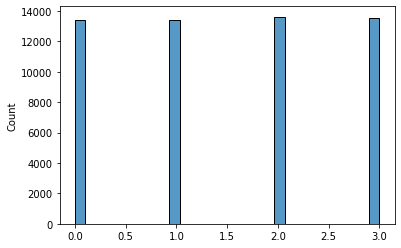

In [11]:
sns.histplot(labels) #多变量直方图

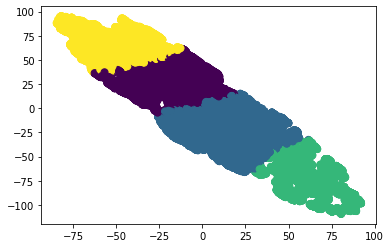

In [12]:
#拉伸后的数据处理效果也很好
rng = np.random.RandomState(13) #随机产生一个一维的，每个元素在[0,1)之间的13个数字的数组。
X_stretched = np.dot(x_embedded, rng.randn(2, 2))  #向量点积和数组乘法，此处用来拉伸数据
gmm = GaussianMixture(n_components=4)        #em算法
gmm.fit(X_stretched)  #fit函数主要用来计算一组数据的特征值，例如平均值，方差，中位数等等固定属性。
p_gmm = gmm.predict(X_stretched)   #训练后返回预测结果，是标签值
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=p_gmm, s=50, cmap='viridis')     #cmap设置颜色

In [13]:
rng = np.random.RandomState(13)
print(rng.randn(2,2))

[[-0.71239066  0.75376638]
 [-0.04450308  0.45181234]]
